In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


upload image.npz and labels file here

In [2]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', "K", "L",
           "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
nclasses = len(classes)


S    550
M    550
E    550
P    550
H    550
W    550
R    550
U    550
G    550
J    550
B    550
O    550
D    550
Q    550
A    550
Y    550
I    550
N    550
X    550
T    550
C    550
K    550
F    550
V    550
L    550
Z    550
Name: labels, dtype: int64


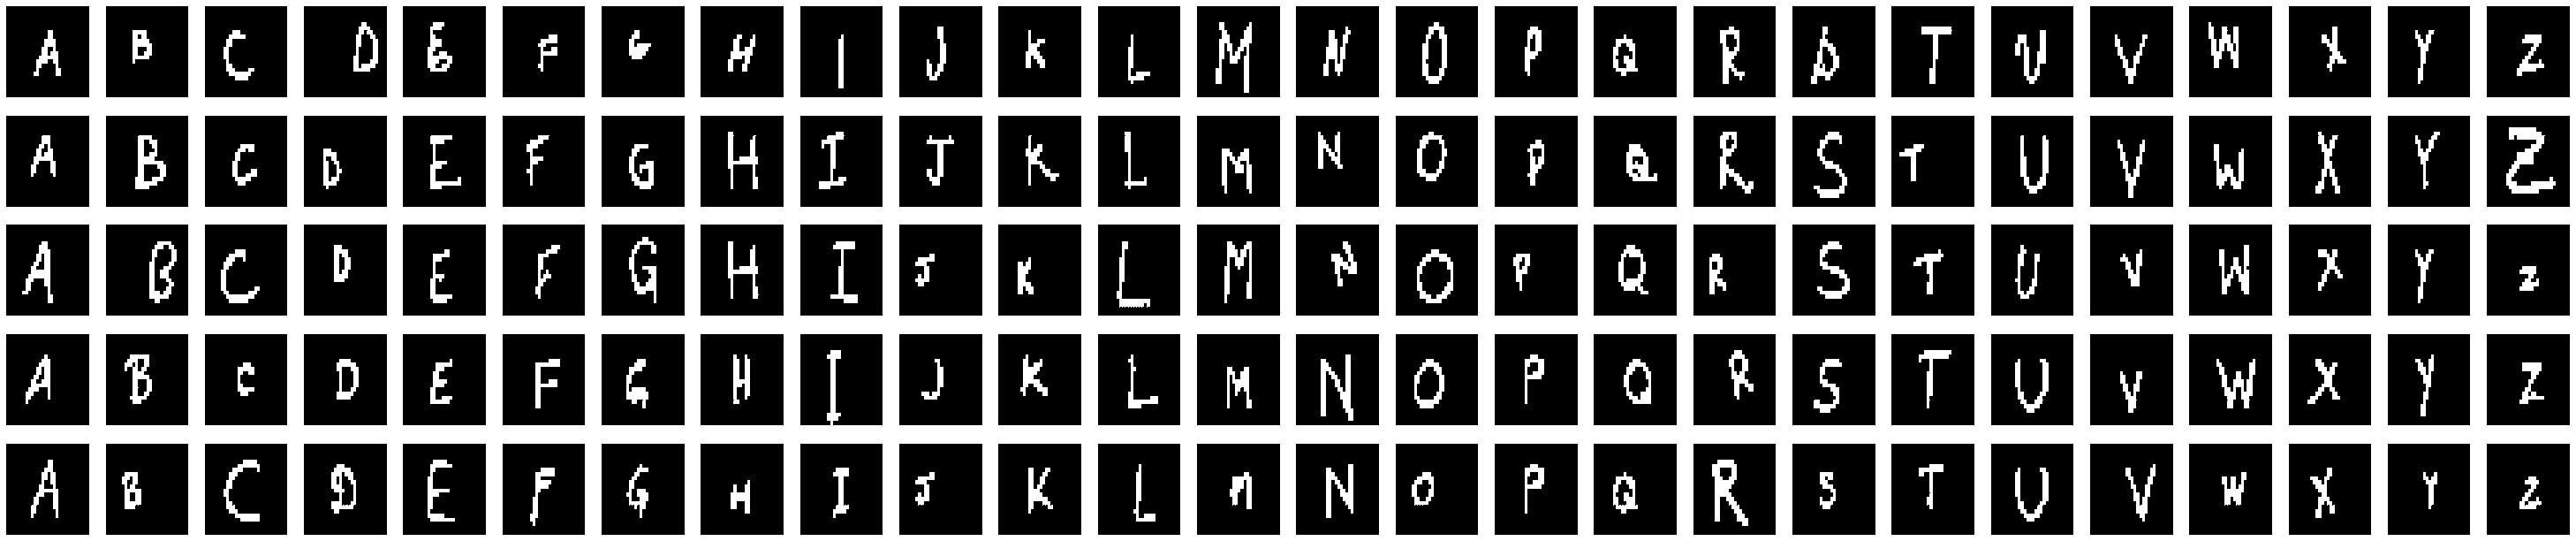

In [3]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2, (1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx)
    p = sns.heatmap(np.reshape(X[idx], (22, 30)), cmap=plt.cm.gray,
                    xticklabels=False, yticklabels=False, cbar=False)
    p = plt.axis('off')
    i += 1
  idx_cls += 1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, train_size=7500, test_size=2500)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [5]:
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(
    X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9952


C:\Users\Acer\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


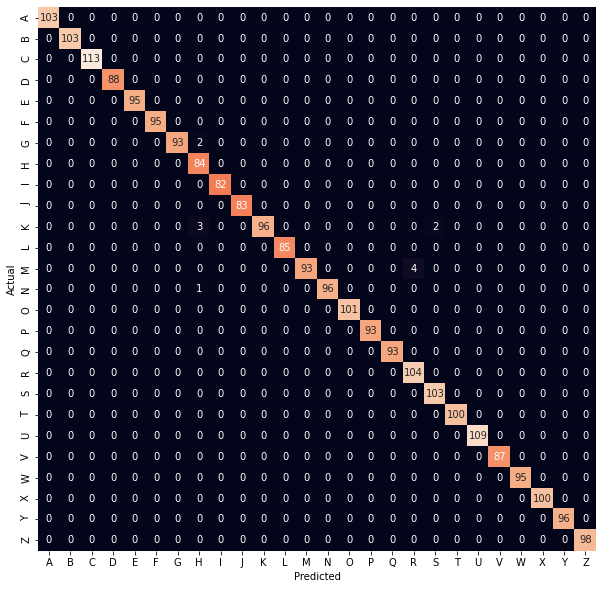

In [6]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10, 10))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)
